In [38]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
from fiona.crs import from_epsg
import numpy as np
import pandas as pd
import csv

plt.rcParams["figure.figsize"] = [20, 6]

In [2]:
# path to shape file
fp = "/home/remus/Desktop/Europe_borders/Europe_borders.shp"

In [3]:
# read data using gpd
data = gpd.read_file(fp)

In [4]:
# check the grid system used
data.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [5]:
# check X and Y coordinates according to the grid system used
data['geometry'].head()

0    MULTIPOLYGON (((19.50115 40.96230, 19.50563 40...
1    POLYGON ((1.43992 42.60649, 1.45041 42.60596, ...
2    POLYGON ((16.00000 48.77775, 16.00000 48.78252...
3    POLYGON ((5.00000 49.79374, 4.99724 49.79696, ...
4    POLYGON ((19.22947 43.53458, 19.22925 43.53597...
Name: geometry, dtype: geometry

In [6]:
data_proj = data.copy()

In [7]:
# project the data to the corresponding coordinate system, namely EPSG3035
# data_proj.crs = '+proj=laea +lat_0=52 +lon_0=10 +x_0=4321000 +y_0=3210000 +ellps=GRS80 +units=m +no_defs'
data_proj = data_proj.to_crs(epsg=3035)


In [8]:
data_proj['geometry'].head()


0    MULTIPOLYGON (((5122010.375 2035145.186, 51223...
1    POLYGON ((3618045.758 2206753.801, 3618896.570...
2    POLYGON ((4761568.782 2869552.349, 4761526.557...
3    POLYGON ((3961258.262 2976824.238, 3961083.984...
4    POLYGON ((5066801.274 2315488.073, 5066765.564...
Name: geometry, dtype: geometry

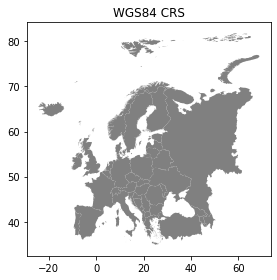

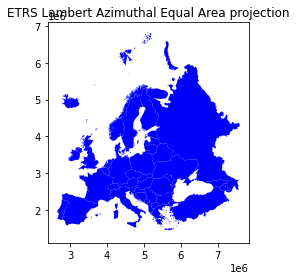

In [9]:
%matplotlib inline

# Plot the WGS84
data.plot(facecolor='gray');

# Add title
plt.title("WGS84 CRS");

# Remove empty white space around the plot
plt.tight_layout()

# Plot the one with ETRS-LAEA projection
data_proj.plot(facecolor='blue');

# Add title
plt.title("ETRS Lambert Azimuthal Equal Area projection");

# Remove empty white space around the plot
plt.tight_layout()


In [11]:
data_proj['country_centroid'] = data_proj.centroid

In [12]:
data_proj

,NAME,ORGN_NAME,geometry,country_centroid
0,Albania,Shqipëria,"MULTIPOLYGON (((5122010.375 2035145.186, 51223...",POINT (5167869.747 2060866.505)
1,Andorra,Andorra,"POLYGON ((3618045.758 2206753.801, 3618896.570...",POINT (3628539.326 2199335.635)
2,Austria,Österreich,"POLYGON ((4761568.782 2869552.349, 4761526.557...",POINT (4631147.196 2728937.248)
3,Belgium,België / Belgique,"POLYGON ((3961258.262 2976824.238, 3961083.984...",POINT (3944209.479 3072545.081)
4,Bosnia Herzegovina,Bosna i Hercegovina,"POLYGON ((5066801.274 2315488.073, 5066765.564...",POINT (4943523.525 2372738.415)
5,Croatia,Hrvatska,"MULTIPOLYGON (((4663467.501 2386592.971, 46625...",POINT (4827100.144 2456127.096)
6,Czech Republic,Cesko,"POLYGON ((4660362.002 3095920.075, 4661208.589...",POINT (4705636.380 2973034.221)
7,Denmark,Danmark,"MULTIPOLYGON (((4449191.637 3539069.631, 44482...",POINT (4323598.894 3652905.447)
8,Estonia,Eesti,"MULTIPOLYGON (((5140250.282 3968949.899, 51397...",POINT (5216503.622 4050864.887)
9,Finland,Suomi,"MULTIPOLYGON (((4988053.825 4182319.699, 49876...",POINT (5100295.670 4660209.133)


In [13]:
broadband100m = "/home/remus/Desktop/Data/2021-05/netBravo-OD-EU-BroadBand-100m/OD_EU_Broadband_100m.shp"

In [14]:
# use broadband measurements
broadbandData = gpd.read_file(broadband100m)
broadbandData.crs


<Projected CRS: EPSG:3035>
Name: ETRS89-extended / LAEA Europe
Axis Info [cartesian]:
- Y[north]: Northing (metre)
- X[east]: Easting (metre)
Area of Use:
- name: Europe - European Union (EU) countries and candidates. Europe - onshore and offshore: Albania; Andorra; Austria; Belgium; Bosnia and Herzegovina; Bulgaria; Croatia; Cyprus; Czechia; Denmark; Estonia; Faroe Islands; Finland; France; Germany; Gibraltar; Greece; Hungary; Iceland; Ireland; Italy; Kosovo; Latvia; Liechtenstein; Lithuania; Luxembourg; Malta; Monaco; Montenegro; Netherlands; North Macedonia; Norway including Svalbard and Jan Mayen; Poland; Portugal including Madeira and Azores; Romania; San Marino; Serbia; Slovakia; Slovenia; Spain including Canary Islands; Sweden; Switzerland; Turkey; United Kingdom (UK) including Channel Islands and Isle of Man; Vatican City State.
- bounds: (-35.579299533, 24.603629139001, 44.820545196533, 84.722623821813)
Coordinate Operation:
- name: Europe Equal Area 2001
- method: Lambert Azi

In [15]:
# see how data frame looks like
print(len(broadbandData.iloc[0]))
broadbandData

10


,Grid_Id,X,Y,Type,Tecnology,Download,Upload,Ping,NumMesurs,geometry
0,100mN3599E2831,1283100,2359900,Wifi,2.4 GHz,5994.0,806.0,102.0,1.0,"POLYGON ((1283100.000 2359900.000, 1283100.000..."
1,100mN9870E8173,1817300,987000,Wifi,2.4 GHz,8803.0,22294.0,90.0,2.0,"POLYGON ((1817300.000 987000.000, 1817300.000 ..."
2,100mN9866E8181,1818100,986600,Wifi,2.4 GHz,3837.0,3015.0,120.0,1.0,"POLYGON ((1818100.000 986600.000, 1818100.000 ..."
3,100mN9528E6532,2653200,1952800,Wifi,2.4 GHz,39794.0,41427.0,43.0,1.0,"POLYGON ((2653200.000 1952800.000, 2653200.000..."
4,100mN9536E6588,2658800,1953600,Wifi,2.4 GHz,25737.0,3107.0,79.0,1.0,"POLYGON ((2658800.000 1953600.000, 2658800.000..."
...,...,...,...,...,...,...,...,...,...,...
9664,100mN3699E1761,8176100,6369900,Cellular,3G,117.0,194.0,996.0,1.0,"POLYGON ((8176100.000 6369900.000, 8176100.000..."
9665,100mN4144E2311,8231100,1414400,Wifi,2.4 GHz,2964.0,194.0,216.0,1.0,"POLYGON ((8231100.000 1414400.000, 8231100.000..."
9666,100mN4057E2400,8240000,1405700,Wifi,2.4 GHz,1244.0,6926.0,170.0,1.0,"POLYGON ((8240000.000 1405700.000, 8240000.000..."
9667,100mN3670E3958,8395800,1367000,Wifi,2.4 GHz,742.0,766.0,195.0,11.0,"POLYGON ((8395800.000 1367000.000, 8395800.000..."


In [16]:
# get the Point representation for each entry of a data frame usign X and Y coordinates
def getCoordinatesList(df):
    points = []
    for i in range(len(df)):
        points.append(Point(df['X'][i], df['Y'][i]))
    return points

# map every Point to the corresponding country
def mapPointsToCountries(points, countriesdf, df):
    countries = {}
    for i in range(len(countriesdf)):
        countries[countriesdf['NAME'][i]] = []
        
    for i in range(len(points)):
        for j in range(len(countriesdf)):
            if countriesdf['geometry'][j].contains(points[i]):
                list = []
                for k in range(len(df.columns)):
                    list.append(df.iloc[i][k])
                countries[countriesdf['NAME'][j]].append(list)
                break
    return countries

# create new data frames for each country based on the mapping and type of measurements
def speedDataFrame(data, country):
    
    return pd.DataFrame(data.get(country),
                        columns = ['Grid_Id', 'X', 
                             'Y', 'Type', 'Technology', 'Download', 'Upload', 'Ping', 'NumMesurs', 'geometry'])

def cellularsignalDataFrame(data, country):
    
    return pd.DataFrame(data.get(country),
                        columns = ['Grid_Id', 'X', 
                             'Y', 'Technology', 'Strength', 'StDev', 'NumMesurs', 'geometry'])

def wifisignalDataFrame(data, country):  
    return pd.DataFrame(data.get(country),
                        columns = ['Grid_Id', 'X', 'Y', 'Technology',
                                   'Frequency', 'SecureType', 'Strength', 'StDev', 'NumMesurs', 'geometry'])

# make United Kingdom = UK for easier representation
def buildSpeedDataFrame(countryData):
    countryDataFrames = {}
    for key in countryData.keys():
        if key == 'United Kingdom':
            countryDataFrames['UK'] = speedDataFrame(countryData, key)
        else:
            countryDataFrames[key] = speedDataFrame(countryData, key)
    return countryDataFrames

def buildCellularSignalDataFrame(countryData):
    countryDataFrames = {}
    for key in countryData.keys():
        if key == 'United Kingdom':
            countryDataFrames['UK'] = cellularsignalDataFrame(countryData, key)
        else:
            countryDataFrames[key] = cellularsignalDataFrame(countryData, key)
    return countryDataFrames

def buildWifiSignalDataFrame(countryData):
    countryDataFrames = {}
    for key in countryData.keys():
        if key == 'United Kingdom':
            countryDataFrames['UK'] = wifisignalDataFrame(countryData, key)
        else:
            countryDataFrames[key] = wifisignalDataFrame(countryData, key)
    return countryDataFrames

In [17]:
# create country data frames for broadband measurements
points = getCoordinatesList(broadbandData)
countriesData = mapPointsToCountries(points, data_proj, broadbandData)
countryDataFrames = buildSpeedDataFrame(countriesData)

In [18]:
countryDataFrames

{'Albania':           Grid_Id        X        Y      Type Technology  Download   Upload  \
 0  100mN0840E1371  5137100  2084000      Wifi    2.4 GHz    3800.0   1203.0   
 1  100mN0784E1418  5141800  2078400      Wifi    2.4 GHz    3280.0   7501.0   
 2  100mN0788E1447  5144700  2078800  Cellular         4G    9085.0    633.0   
 3  100mN0783E1418  5141800  2078300      Wifi    2.4 GHz    1698.0  15641.0   
 4  100mN0788E1447  5144700  2078800      Wifi    2.4 GHz       0.0    837.0   
 5  100mN1038E1286  5128600  2103800      Wifi    2.4 GHz    1963.0   2037.0   
 6  100mN0789E1446  5144600  2078900      Wifi    2.4 GHz    4445.0    844.0   
 7  100mN0415E2202  5220200  2041500      Wifi    2.4 GHz    5954.0   1835.0   
 8  100mN0795E1388  5138800  2079500      Wifi    2.4 GHz    4699.0   4222.0   
 9  100mN0797E1411  5141100  2079700      Wifi    2.4 GHz   10828.0   2569.0   
 
     Ping  NumMesurs                                           geometry  
 0  183.0        1.0  POLYGON ((5

In [19]:
countryDataFrames.get('UK')

,Grid_Id,X,Y,Type,Technology,Download,Upload,Ping,NumMesurs,geometry
0,100mN6030E2858,3285800,3603000,Wifi,2.4 GHz,659.0,251.0,221.0,1.0,"POLYGON ((3285800 3603000, 3285800 3603100, 32..."
1,100mN6061E2929,3292900,3606100,Wifi,2.4 GHz,20281.0,1906.0,44.0,3.0,"POLYGON ((3292900 3606100, 3292900 3606200, 32..."
2,100mN6099E3009,3300900,3609900,Wifi,2.4 GHz,13851.0,9450.0,67.0,1.0,"POLYGON ((3300900 3609900, 3300900 3610000, 33..."
3,100mN6120E3010,3301000,3612000,Wifi,2.4 GHz,7929.0,11206.0,133.0,2.0,"POLYGON ((3301000 3612000, 3301000 3612100, 33..."
4,100mN1441E3259,3325900,3144100,Wifi,2.4 GHz,1803.0,890.0,98.0,1.0,"POLYGON ((3325900 3144100, 3325900 3144200, 33..."
...,...,...,...,...,...,...,...,...,...,...
938,100mN2782E6497,3649700,3278200,Wifi,2.4 GHz,34588.0,3664.0,65.0,3.0,"POLYGON ((3649700 3278200, 3649700 3278300, 36..."
939,100mN2424E6529,3652900,3242400,Wifi,2.4 GHz,1729.0,971.0,195.0,1.0,"POLYGON ((3652900 3242400, 3652900 3242500, 36..."
940,100mN1723E6615,3661500,3172300,Wifi,2.4 GHz,19493.0,4213.0,32.0,1.0,"POLYGON ((3661500 3172300, 3661500 3172400, 36..."
941,100mN2048E6653,3665300,3204800,Wifi,2.4 GHz,11249.0,1789.0,77.0,1.0,"POLYGON ((3665300 3204800, 3665300 3204900, 36..."


In [20]:
def w_avg(df, values, weights):
    d = df[values]
    w = df[weights]
    try:
        return (d * w).sum() / w.sum()
    except ZeroDivisionError:
        return d.mean()

In [21]:
# statistical measurements for each country 
countryDownload = {}
countryUpload = {}
countryPing = {}
# statistical measurements for different connections
Wifi = {}
Cellular = {}
# number of measurement for cellular technologies
technologyComparison = {}
C2G = []
C3G = []
C4G = []

for key in countryDataFrames.keys():
    df = countryDataFrames.get(key)
    if sum((df['NumMesurs'])) > 500:
        
        mean = w_avg(df, 'Download', 'NumMesurs')
        download = np.array(df['Download'])
        download = np.sort(download)
        value = (mean, download.std(), download.min(), download.max(), 
                 np.percentile(download, 25), np.median(download), np.percentile(download, 75))
        countryDownload[key] = value

        mean = w_avg(df, 'Upload', 'NumMesurs')
        upload = np.array(df['Upload'])
        upload = np.sort(upload)
        value = (mean, upload.std(), upload.min(), upload.max(), 
                 np.percentile(upload, 25), np.median(upload), np.percentile(upload, 75))
        countryUpload[key] = value

        mean = w_avg(df, 'Ping', 'NumMesurs')
        ping = np.array(df['Ping'])
        ping = np.sort(ping)
        value = (mean, ping.std(), ping.min(), ping.max(), 
                 np.percentile(ping, 25), np.median(ping), np.percentile(ping, 75))
        countryPing[key] = value
        
        dfWifi = df[df['Type'] == "Wifi"]
        dfCellular = df[df['Type'] == "Cellular"]
        
        mean = w_avg(dfWifi, 'Download', 'NumMesurs')
        download = np.array(dfWifi['Download'])
        download = np.sort(download)
        value = (mean, download.std(), download.min(), download.max(), 
                 np.percentile(download, 25), np.median(download), np.percentile(download, 75))
        Wifi[key] = value

        mean = w_avg(dfCellular, 'Download', 'NumMesurs')
        download = np.array(dfCellular['Download'])
        download = np.sort(download)
        value = (mean, download.std(), download.min(), download.max(), 
                 np.percentile(download, 25), np.median(download), np.percentile(download, 75))
        Cellular[key] = value
        
        df2G = dfCellular[dfCellular['Technology'] == "2G"]
        df3G = dfCellular[dfCellular['Technology'] == "3G"]
        df4G = dfCellular[dfCellular['Technology'] == "4G"]
        
        C2G.append(sum((df2G['NumMesurs'])))
        C3G.append(sum((df3G['NumMesurs'])))
        C4G.append(sum((df4G['NumMesurs'])))
        
technologyComparison["2G"] = C2G
technologyComparison["3G"] = C3G
technologyComparison["4G"] = C4G

258 89
344 324
130 42
17 478
177 111
385 297
150 65
1229 1196
461 138
221 68
228 87
727 216
{'2G': [0, 13.0, 0, 2.0, 1.0, 17.0, 3.0, 26.0, 1.0, 2.0, 1.0, 12.0], '3G': [46.0, 115.0, 17.0, 660.0, 52.0, 161.0, 47.0, 1134.833333333333, 40.0, 35.0, 10.0, 115.0], '4G': [70.0, 411.0, 32.0, 141.0, 129.0, 473.0, 69.0, 1078.833333333333, 140.0, 59.0, 86.0, 163.0]}


                   2G         3G         4G
Belgium      0.000000  39.655172  60.344828
Croatia      2.411874  21.335807  76.252319
Denmark      0.000000  34.693878  65.306122
Estonia      0.249066  82.191781  17.559153
France       0.549451  28.571429  70.879121
Germany      2.611367  24.731183  72.657450
Ireland      2.521008  39.495798  57.983193
Italy        1.160887  50.669743  48.169370
Netherlands  0.552486  22.099448  77.348066
Spain        2.083333  36.458333  61.458333
Sweden       1.030928  10.309278  88.659794
UK           4.137931  39.655172  56.206897


Text(0, 0.5, 'Percentage for technology usage (%)')

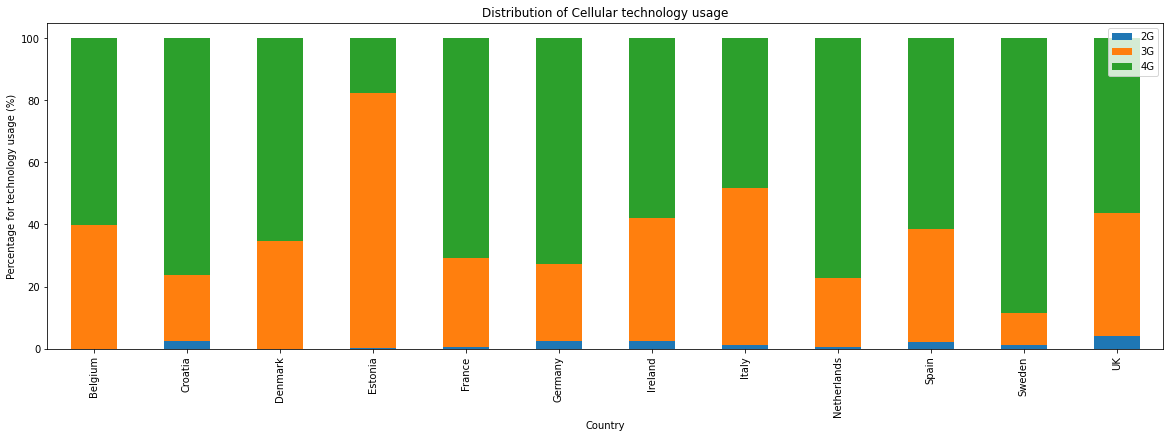

In [39]:
plotdata = pd.DataFrame(technologyComparison, index=countryDownload.keys())

stacked_data = plotdata.apply(lambda x: x*100/sum(x), axis=1)
print(stacked_data)
stacked_data.plot(kind="bar", stacked=True)
plt.title("Distribution of Cellular technology usage")
plt.xlabel("Country")
plt.ylabel("Percentage for technology usage (%)")

[20494.3658392435, 20143.016657255786, 18368.856870229007, 9439.383701188455, 14986.425233644859, 21165.358934859156, 13432.126943005182, 8608.58102106227, 24737.45758258258, 12710.286970423662, 18886.502901353964, 14967.091385522437]
[7202.2647754137115, 5387.124788255223, 10879.536259541985, 1842.4898132427843, 6452.27570093458, 6480.323283450704, 4458.295336787564, 2364.091465201465, 12460.696696696697, 4770.260724753531, 11358.092843326885, 7723.855224369473]
[128.56855791962175, 106.90993788819875, 86.42748091603053, 306.9295415959253, 164.60093457943924, 132.89986795774647, 197.31865284974094, 93.9008882783881, 111.86974474474475, 68.73714361843858, 121.25918762088975, 134.99508679986897]
[20538.799315068492, 16644.454545454544, 18403.894736842107, 16973.090666666667, 12740.702549575071, 22489.382479950647, 12883.618683001532, 7966.176552285875, 25276.978279756735, 12538.073010664479, 18404.55238095238, 15365.686210640608]
[20214.741379310344, 28139.730055658627, 18029.2040816326

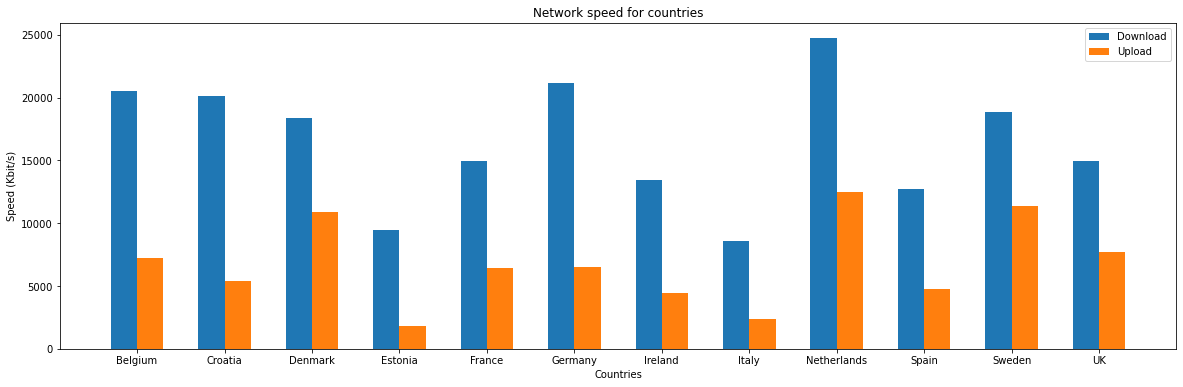

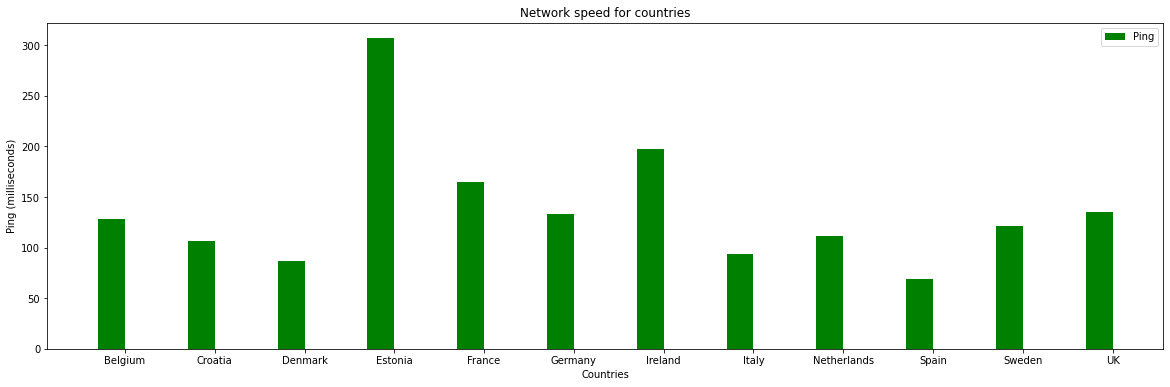

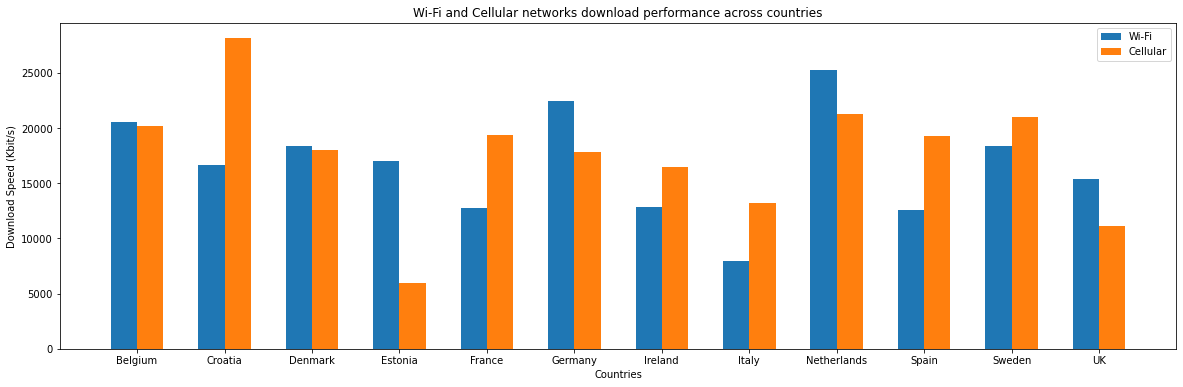

In [40]:
labels = countryDownload.keys()


download = []
upload = []
ping = []
wifi = []
cellular = []

# prepare plotting data
for key in countryDownload.keys():
    download.append(countryDownload.get(key)[0])
    upload.append(countryUpload.get(key)[0]) 
    ping.append(countryPing.get(key)[0])
    wifi.append(Wifi.get(key)[0])
    cellular.append(Cellular.get(key)[0])

# plot download and upload speed for each country
X_axis = np.arange(len(labels))
w = 0.3

plt.bar(X_axis - w/2, download, w, label = 'Download', align = 'center')
plt.bar(X_axis + w/2, upload, w, label = 'Upload', align = 'center')
# plt.bar(X_axis + w, ping, w, label = 'Ping', align = 'center')

plt.xticks(X_axis, labels)
plt.xlabel("Countries")
plt.ylabel("Speed (Kbit/s)")
plt.title("Network speed for countries")

plt.legend()
plt.show()

# plot ping for each country
plt.bar(X_axis - w/2, ping, w, label = 'Ping', align = 'center', color='Green')
plt.xticks(X_axis, labels)
plt.xlabel("Countries")
plt.ylabel("Ping (milliseconds)")
plt.title("Network speed for countries")
plt.legend()
plt.show()

# plot download speed for Wi-Fi and cellular connections
plt.bar(X_axis - w/2, wifi, w, label = 'Wi-Fi', align = 'center')
plt.bar(X_axis + w/2, cellular, w, label = 'Cellular', align = 'center')
# plt.bar(X_axis + w, ping, w, label = 'Ping', align = 'center')

plt.xticks(X_axis, labels)
plt.xlabel("Countries")
plt.ylabel("Download Speed (Kbit/s)")
plt.title("Wi-Fi and Cellular networks download performance across countries")

plt.legend()
plt.show()

In [24]:
# path to cellular and Wi-Fi data
fileCellular100m = "/home/remus/Desktop/Data/2021-05/netBravo-OD-EU-Cellular-100m/OD_EU_Cellular_100m.shp"
fileWifi100m = "/home/remus/Desktop/Data/2021-05/netBravo-OD-EU-Wifi-100m/OD_EU_Wifi_100m.shp"

In [25]:
cellular100m = gpd.read_file(fileCellular100m)

wifi100m = gpd.read_file(fileWifi100m)


In [26]:
cellular100m

,Grid_Id,X,Y,Tecnology,Strenght,StDev,NumMesurs,geometry
0,100mN5389E1104,1110400,2538900,3G,-104.0,0.0,2.0,"POLYGON ((1110400.000 2538900.000, 1110400.000..."
1,100mN5386E1107,1110700,2538600,2G,-104.0,0.0,2.0,"POLYGON ((1110700.000 2538600.000, 1110700.000..."
2,100mN5370E1134,1113400,2537000,3G,-104.0,0.0,1.0,"POLYGON ((1113400.000 2537000.000, 1113400.000..."
3,100mN5322E1185,1118500,2532200,3G,-104.0,0.0,1.0,"POLYGON ((1118500.000 2532200.000, 1118500.000..."
4,100mN5357E1255,1125500,2535700,3G,-104.0,0.0,1.0,"POLYGON ((1125500.000 2535700.000, 1125500.000..."
...,...,...,...,...,...,...,...,...
166826,100mN3746E4136,8413600,1374600,4G,-104.0,0.0,1.0,"POLYGON ((8413600.000 1374600.000, 8413600.000..."
166827,100mN3742E4138,8413800,1374200,3G,-104.0,0.0,3.0,"POLYGON ((8413800.000 1374200.000, 8413800.000..."
166828,100mN3739E4141,8414100,1373900,3G,-103.0,15.0,6.0,"POLYGON ((8414100.000 1373900.000, 8414100.000..."
166829,100mN3740E4141,8414100,1374000,3G,-104.0,0.0,7.0,"POLYGON ((8414100.000 1374000.000, 8414100.000..."


In [27]:
wifi100m

,Grid_Id,X,Y,Tecnology,Frequency,SecureType,Strenght,StDev,NumMesurs,geometry
0,100mN3427E3156,1315600,2342700,2.4 GHz,2437 MHz,Closed,-95.0,0.0,1.0,"POLYGON ((1315600.000 2342700.000, 1315600.000..."
1,100mN0191E6989,1698900,1019100,5 GHz,5560 MHz,Closed,-90.0,0.0,1.0,"POLYGON ((1698900.000 1019100.000, 1698900.000..."
2,100mN0146E7001,1700100,1014600,2.4 GHz,2412 MHz,Opened,-62.0,1.0,2.0,"POLYGON ((1700100.000 1014600.000, 1700100.000..."
3,100mN0146E7001,1700100,1014600,2.4 GHz,2467 MHz,Closed,-92.0,0.0,1.0,"POLYGON ((1700100.000 1014600.000, 1700100.000..."
4,100mN0146E7001,1700100,1014600,2.4 GHz,2472 MHz,Closed,-93.0,0.0,1.0,"POLYGON ((1700100.000 1014600.000, 1700100.000..."
...,...,...,...,...,...,...,...,...,...,...
717832,100mN3736E4146,8414600,1373600,2.4 GHz,2412 MHz,Opened,-72.0,4.0,13.0,"POLYGON ((8414600.000 1373600.000, 8414600.000..."
717833,100mN3736E4146,8414600,1373600,2.4 GHz,2422 MHz,Closed,-65.0,0.0,1.0,"POLYGON ((8414600.000 1373600.000, 8414600.000..."
717834,100mN3736E4146,8414600,1373600,2.4 GHz,2427 MHz,Closed,-76.0,0.0,1.0,"POLYGON ((8414600.000 1373600.000, 8414600.000..."
717835,100mN4528E5695,8569500,1452800,2.4 GHz,2447 MHz,Closed,-84.0,0.0,1.0,"POLYGON ((8569500.000 1452800.000, 8569500.000..."


In [28]:
# create countries data frames for cellular measurements
import time

start = time.process_time()
points = getCoordinatesList(cellular100m)
print(time.process_time() - start)

start = time.process_time()
countriesData = mapPointsToCountries(points, data_proj, cellular100m)
print(time.process_time() - start)

start = time.process_time()
cellularStrength = buildCellularSignalDataFrame(countriesData)
print(time.process_time() - start)

7.247815941999988
2543.801059946
0.47175637899999856


In [29]:
# create countries data frames for cellular measurements
start = time.process_time()
points = getCoordinatesList(wifi100m)
print(time.process_time() - start)

start = time.process_time()
countriesData = mapPointsToCountries(points, data_proj, wifi100m)
print(time.process_time() - start)

start = time.process_time()
wifiStrength = buildWifiSignalDataFrame(countriesData)
print(time.process_time() - start)

30.791021582000212
11840.610854628001
2.0329186899998604


In [30]:
# print(wifiStrength.get('UK'))

In [31]:
# country-wise statistical measurements for different connections
cellularStats = {}
wifiStats = {}

# country-wise statistical measurements for Wi-Fi security types
wifiSecurity = {}
wifiOpen = []
wifiClosed = []

openWCoverage = {}
closedWCoverage = {}

for key in cellularStrength.keys():
    df = cellularStrength.get(key)
    if len(df != 0):
        if sum((df['NumMesurs'])) > 30000:
            mean = w_avg(df, 'Strength', 'NumMesurs')
            signal = np.array(df['Strength'])
            signal = np.sort(signal)
            value = (mean, signal.std(), signal.min(), signal.max(), 
                     np.percentile(signal, 25), np.median(signal), np.percentile(signal, 75))
            cellularStats[key] = value

for key in cellularStats.keys():
    df = wifiStrength.get(key)
    if len(df != 0):
        if sum((df['NumMesurs'])) > 10000:
            mean = w_avg(df, 'Strength', 'NumMesurs')
            signal = np.array(df['Strength'])
            signal = np.sort(signal)
            value = (mean, signal.std(), signal.min(), signal.max(), 
                     np.percentile(signal, 25), np.median(signal), np.percentile(signal, 75))
            wifiStats[key] = value
            
            dfOpen = df[df['SecureType'] == "Opened"]
            dfClosed = df[df['SecureType'] == "Closed"]
            
            wifiOpen.append(sum((dfOpen['NumMesurs'])))
            wifiClosed.append(sum((dfClosed['NumMesurs'])))
            
            mean = w_avg(dfOpen, 'Strength', 'NumMesurs')
            signal = np.array(dfOpen['Strength'])
            signal = np.sort(signal)
            value = (mean, signal.std(), signal.min(), signal.max(), 
                     np.percentile(signal, 25), np.median(signal), np.percentile(signal, 75))
            openWCoverage[key] = value
            
            mean = w_avg(dfClosed, 'Strength', 'NumMesurs')
            signal = np.array(dfClosed['Strength'])
            signal = np.sort(signal)
            value = (mean, signal.std(), signal.min(), signal.max(), 
                     np.percentile(signal, 25), np.median(signal), np.percentile(signal, 75))
            closedWCoverage[key] = value
        
wifiSecurity["Open"] = wifiOpen
wifiSecurity["Closed"] = wifiClosed

9764.0 45130.0
84541.0 276441.0
97119.0 412102.0
142549.0 540266.0
192232.0 767827.0
198607.0 794751.0
217675.0 888791.0
340921.0 1460951.0
379341.0 1671428.0
384048.0 1695459.0
405592.0 1830101.0
457768.0 2011422.0
{'Open': [9764.0, 74777.0, 12578.0, 45430.0, 49683.0, 6375.0, 19068.0, 123246.0, 38420.0, 4707.0, 21544.0, 52176.0], 'Closed': [45130.0, 231311.0, 135661.0, 128164.0, 227561.0, 26924.0, 94040.0, 572160.0, 210477.0, 24031.0, 134642.0, 181321.0]}


                  Open     Closed
Austria      17.787008  82.212992
Belgium      24.429903  75.570097
Croatia       8.484947  91.515053
France       26.170259  73.829741
Germany      17.920316  82.079684
Greece       19.144719  80.855281
Ireland      16.858224  83.141776
Italy        17.722884  82.277116
Netherlands  15.436104  84.563896
Serbia       16.379010  83.620990
Spain        13.793810  86.206190
UK           22.345469  77.654531


Text(0, 0.5, 'Percentage for technology usage (%)')

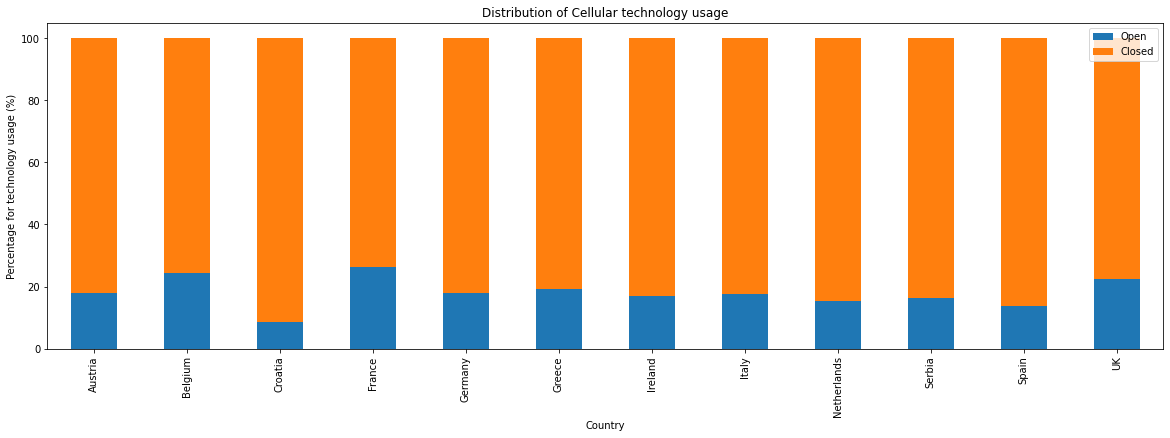

In [41]:
plotdata = pd.DataFrame(wifiSecurity, index=wifiStats.keys())

stacked_data = plotdata.apply(lambda x: x*100/sum(x), axis=1)
print(stacked_data)
stacked_data.plot(kind="bar", stacked=True)
plt.title("Distribution of Cellular technology usage")
plt.xlabel("Country")
plt.ylabel("Percentage for technology usage (%)")

[-75.47859483818107, -81.29309814515159, -79.6972491652091, -81.55428131190843, -81.00207314373125, -78.71529411764706, -79.04473463394169, -80.84116320205118, -81.01569495054659, -79.65052050138092, -79.45265503156331, -79.72109782275376]
[-80.8502548194106, -82.51867399302238, -84.3332571630756, -81.66254174339127, -82.84542166715738, -81.7777447630367, -81.73568694172693, -83.37062534955257, -81.79682815699577, -83.42915400940451, -82.09509662660983, -80.23164443169848]


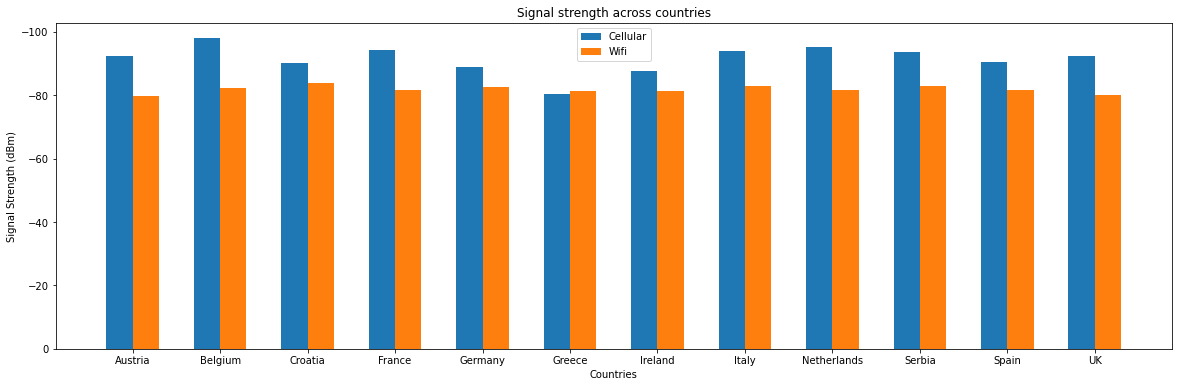

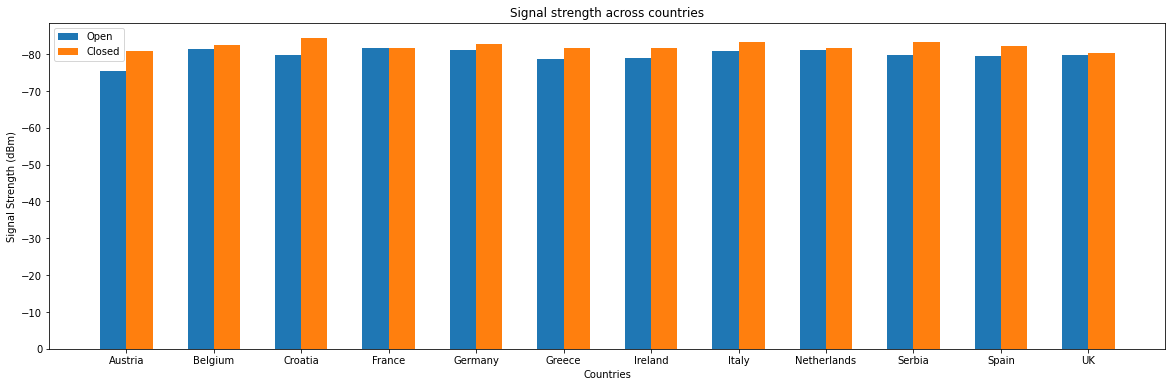

In [42]:
labels = cellularStats.keys()


cellular = []
wifi = []
openW = []
closedW = []

for key in cellularStats.keys():
    cellular.append(cellularStats.get(key)[0])
    wifi.append(wifiStats.get(key)[0])
    openW.append(openWCoverage.get(key)[0])
    closedW.append(closedWCoverage.get(key)[0])

# plot cellular and Wi-Fi signal strength for different countries
X_axis = np.arange(len(labels))
w = 0.3

plt.bar(X_axis - w/2, cellular, w, label = 'Cellular', align = 'center')
plt.bar(X_axis + w/2, wifi, w, label = 'Wifi', align = 'center')

plt.xticks(X_axis, labels)
plt.xlabel("Countries")
plt.ylabel("Signal Strength (dBm)")
plt.title("Signal strength across countries")
plt.gca().invert_yaxis()

plt.legend()
plt.show()

# plot open and closed Wi-Fi for different countries
plt.bar(X_axis - w/2, openW, w, label = 'Open', align = 'center')
plt.bar(X_axis + w/2, closedW, w, label = 'Closed', align = 'center')

plt.xticks(X_axis, labels)
plt.xlabel("Countries")
plt.ylabel("Signal Strength (dBm)")
plt.title("Signal strength across countries")
plt.gca().invert_yaxis()

plt.legend()
plt.show()

<ipython-input-34-6d686955c053>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Austria', 'Belgium', 'Croatia', 'France', 'Germany', 'Greece', 'Ireland', 'Italy',


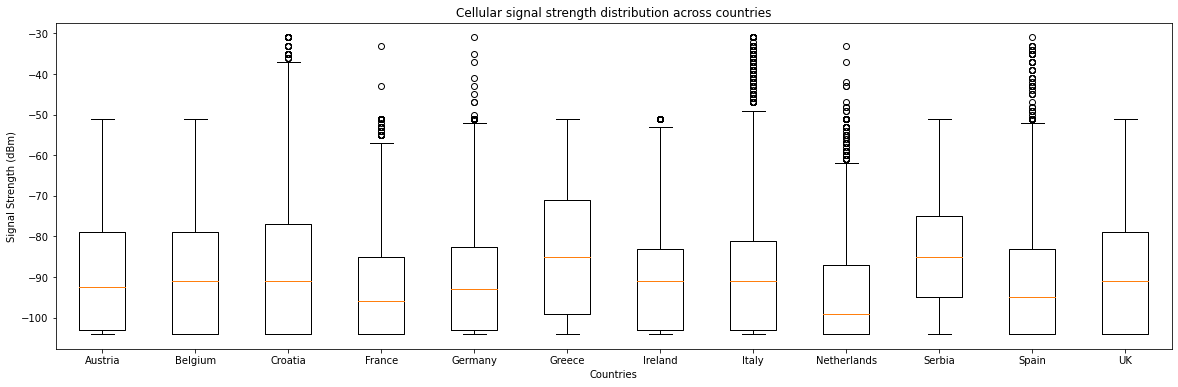

In [34]:
celData = []
wifiData = []

for key in cellularStats.keys():
    df = cellularStrength.get(key)
    celData.append(df['Strength'])
    df = wifiStrength.get(key)
    wifiData.append(df['Strength'])
    
fig = plt.figure(figsize =(20, 6))
ax = fig.add_subplot(111)

# x-axis labels
ax.set_xticklabels(['Austria', 'Belgium', 'Croatia', 'France', 'Germany', 'Greece', 'Ireland', 'Italy',
                   'Netherlands', 'Serbia', 'Spain', 'UK'])

 
# Creating plot
bp = ax.boxplot(celData)

plt.ylabel("Signal Strength (dBm)")
plt.xlabel("Countries")
plt.title("Cellular signal strength distribution across countries")

# show plot
plt.show()

<ipython-input-35-4ad23ea339fe>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Austria', 'Belgium', 'Croatia', 'France', 'Germany', 'Greece', 'Ireland', 'Italy',


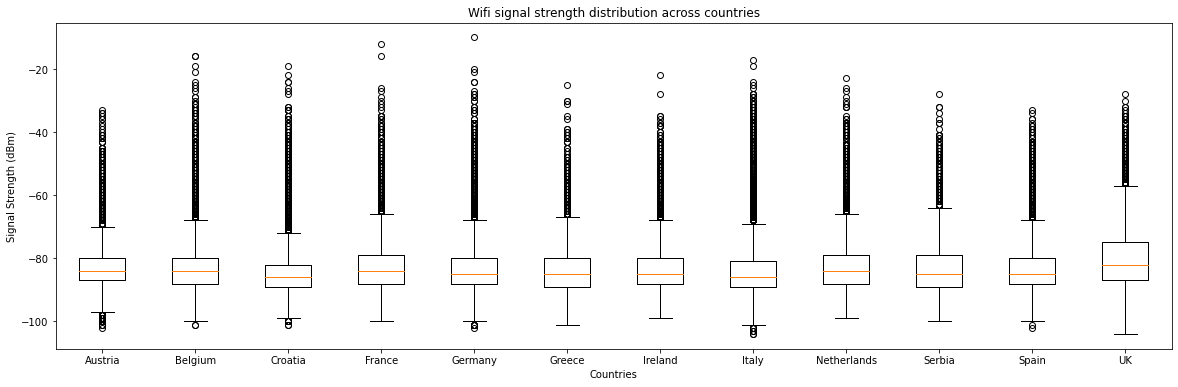

In [35]:
fig = plt.figure(figsize =(20, 6))
ax = fig.add_subplot(111)

# x-axis labels
ax.set_xticklabels(['Austria', 'Belgium', 'Croatia', 'France', 'Germany', 'Greece', 'Ireland', 'Italy',
                   'Netherlands', 'Serbia', 'Spain', 'UK'])

 
# Creating plot
bp = ax.boxplot(wifiData)

plt.ylabel("Signal Strength (dBm)")
plt.xlabel("Countries")
plt.title("Wifi signal strength distribution across countries")
 
# show plot
plt.show()

In [36]:
# to data frames in csv files
import csv
my_dict = cellularStrength
my_dict2 = wifiStrength
with open('cellular.csv', 'w') as f:
    for key in my_dict.keys():
        f.write("%s,%s\n"%(key,my_dict[key]))
        
with open('wifi.csv', 'w') as f:
    for key in my_dict.keys():
        f.write("%s,%s\n"%(key,my_dict[key]))

In [37]:
filename ="/home/remus/Desktop/wifi.csv"
  
# opening the file using "with" 
# statement
with open(filename, 'r') as data:
      
    for line in csv.DictReader(data):
        print(line)

{'Albania': '0  100mN0788E1447  5144700  2078800         3G    -104.0    0.0        1.0   ', '          Grid_Id        X        Y Technology  Strength  StDev  NumMesurs  \\': None}
{'Albania': '1  100mN0788E1447  5144700  2078800         4G    -104.0    0.0       54.0   ', '          Grid_Id        X        Y Technology  Strength  StDev  NumMesurs  \\': None}
{'Albania': '2  100mN9204E1798  5179800  1920400         3G     -91.0    0.0        1.0   ', '          Grid_Id        X        Y Technology  Strength  StDev  NumMesurs  \\': None}
{'Albania': '3  100mN0415E2202  5220200  2041500         2G     -83.0    0.0        2.0   ', '          Grid_Id        X        Y Technology  Strength  StDev  NumMesurs  \\': None}
{'Albania': '                                            geometry  ', '          Grid_Id        X        Y Technology  Strength  StDev  NumMesurs  \\': None}
{'Albania': '0  POLYGON ((5144700 2078800', '          Grid_Id        X        Y Technology  Strength  StDev  NumMesur